In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\\NLP Practice\\UPDATED_NLP_COURSE\\TextFiles\\smsspamcollection.tsv", sep="\t")

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.shape

(5572, 4)

In [5]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

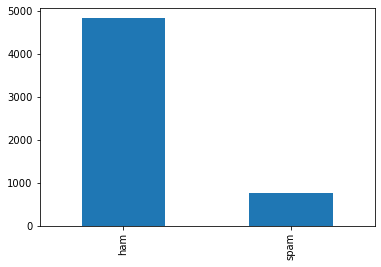

In [13]:
df.label.value_counts().plot(kind="bar")

# Using only numerical Features (length and punct)

In [14]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [15]:
df.label.unique()

array(['ham', 'spam'], dtype=object)

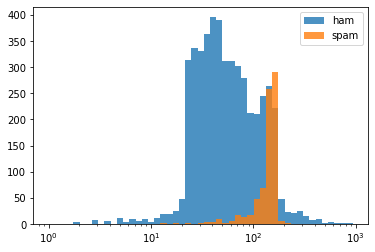

In [17]:
%matplotlib inline
plt.xscale("log")
bins = 1.15**(np.arange(0,50))
plt.hist(df[df.label=="ham"]["length"], bins=bins, alpha=0.8)
plt.hist(df[df.label=="spam"]["length"], bins=bins, alpha=0.8)
plt.legend(("ham","spam"))
plt.show()

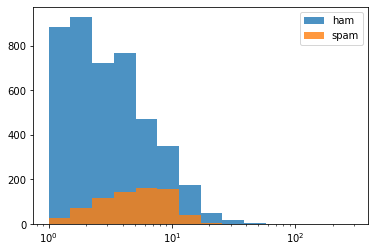

In [20]:
%matplotlib inline
plt.xscale("log")
bins = 1.5**(np.arange(0,15))
plt.hist(df[df.label=="ham"]["punct"], bins=bins, alpha=0.8)
plt.hist(df[df.label=="spam"]["punct"], bins=bins, alpha=0.8)
plt.legend(("ham","spam"))
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
x = df.drop(columns=["label","message"])
y = df["label"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [24]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3900, 2), (1672, 2), (3900,), (1672,))

In [25]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr_model = LogisticRegression(solver="lbfgs")

In [29]:
lr_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = lr_model.predict(x_test)

In [31]:
from sklearn import metrics

In [32]:
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [33]:
print(metrics.confusion_matrix(y_test, y_pred))

[[1404   44]
 [ 219    5]]


In [34]:
cfm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), index=["ham","spam"], columns=["ham","spam"])

In [35]:
cfm

,ham,spam
ham,1404,44
spam,219,5


In [37]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [38]:
print(metrics.accuracy_score(y_test, y_pred))

0.8427033492822966


In [39]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)
y_pred = nb_model.predict(x_test)

In [40]:
print(metrics.confusion_matrix(y_test, y_pred))

[[1438   10]
 [ 224    0]]


In [41]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672

